In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [12]:
breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.data[0:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [10]:
print(breast_cancer_data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print('feature names: ',breast_cancer_data.feature_names)

feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
target, target_names = breast_cancer_data.target, breast_cancer_data.target_names
print(target[0], target_names[0])
# The first data point is tagged as malignant

0 malignant


In [6]:
#split the data
training_data,validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, target, test_size = 0.2, random_state = 100)

print('length of training data and training labeles: ',len(training_data), len(training_labels))


length of training data and training labeles:  455 455


In [7]:
#create classifier with n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(training_data, training_labels)
print('score: ',classifier.score(validation_data, validation_labels))

score:  0.9473684210526315


In [8]:
#Let's find whether there is a better value for k
accuracies = []
for k in range(1,100):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
  #print('k',k,'score: ',classifier.score(validation_data, validation_labels))
k_list = np.arange(1,100)


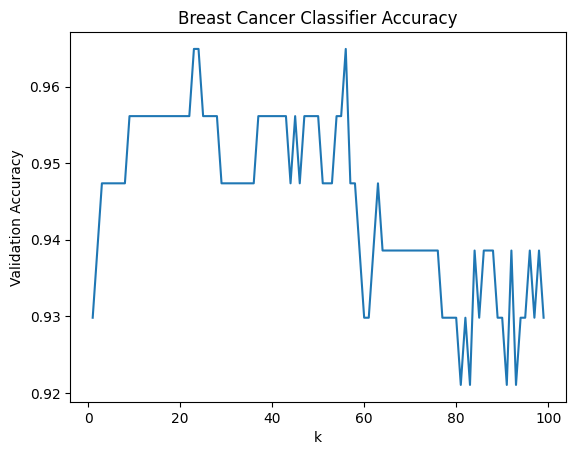

In [9]:
plt.plot(k_list, accuracies)
plt.title("Breast Cancer Classifier Accuracy")
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()


In [18]:
k_list[accuracies.index(max(accuracies))]

23